In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Is the AOV reasonable?
The problem states that the calculated value of AOV (average order value, i.e. total revenue/# of purchases) is 3145.13 for sales over a 30 day window. It seems suspicious that the average order, for shoes stores, turns out to be over \$3000 doallrs. Let's see how we would get that! The average person shopping on a shoe store is not likely to be buying more than a couple of pair of shoes per purchase, and so to get an AOV of over 3000 requires an average shoe price of over \$600, which is comporable to lower-end designer shoe prices.

In [3]:
dF = None

# get data into a pandas dataframe
with open("shop.csv", 'rb') as data:
    dF = pd.read_csv(data)
    
# convert into numpy matrix
npData = dF.as_matrix(columns=['order_amount'])

# divide by number of sales
AOV = float(np.sum(npData))/dF.shape[0]
print "AOV is $" + str(round(AOV,2))

AOV is $3145.13


Indeed, we get \$3145.13 as our AOV. Let's check out some of the underlying data and see if we can detect any patterns that might lead to this high AOV value.

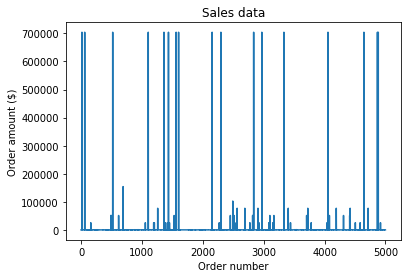

In [4]:
plt.plot(npData)
plt.ylabel('Order amount ($)')
plt.xlabel('Order number')
plt.title('Sales data')
plt.show()


Hmm, that data looks pretty weird - there are weird spikes everywhere. Maybe if we put it into a friendlier format we might be able to tell what's actually happening. Here is a histogram and some basic statistics that describe the dataset:


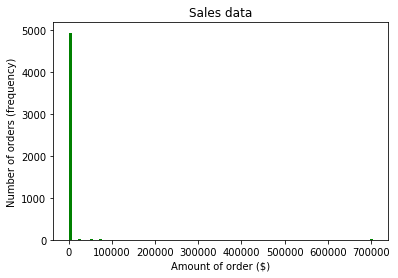

Mean: 3145.128
Median: 284.0
Std. deviation: 41278.4108884


In [5]:
plt.hist(npData, 100, facecolor='green')
plt.ylabel('Number of orders (frequency)')
plt.xlabel('Amount of order ($)')
plt.title('Sales data')
plt.show()

print "Mean: " + str(np.mean(npData))
print "Median: " + str(np.median(npData))
print "Std. deviation: " + str(np.std(npData))

There seem to be a lot of orders grouped into the first bar, and a few outliers further out, and then very few clustered at around \$700000. So we have a few outliers very far to the right that is dragging the mean much above the median.

## Store 42 - a case of the 607
Interesting - let's examine what's happening behind the scenes here. Lets check out the store(s) getting \$700000 orders.

In [6]:
dF.loc[dF['order_amount'] >= 650000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


All of these orders are from the same seller - shop 42! Additionally, these orders are all the same amount of sneakers , 2000, and at the same price. Let's see if any other sellers sell this quantity of shoes.

In [7]:
dF.loc[dF['total_items'] >= 500]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


It seems like this is the only store even selling more than 1000 pairs of shoes per purchase. As far as we know, then, it is unlikely that the store should be making this much money. 

Note that every single purchase above for 2000 pairs of shoes is from the same customer - 607! This definitely still could be normal, but let's check the other sales of this store.


In [8]:
dF.loc[dF['shop_id'] == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


The other purchases on the store are much more normal - a couple purchases per customer, starkly contrasted with the orders of 2000 pairs that customer 607 keeps putting into the database. Let's poke around customer 607's transactions.

In [15]:
dF.loc[dF['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ppi
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Our suspicions are at this point even stronger. Let's check the purchase history of every customer

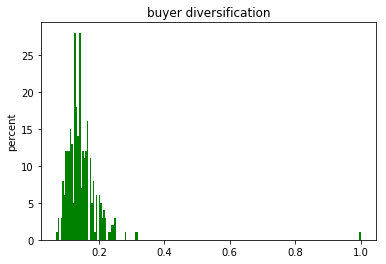

,percent
607,1.000000
806,0.315789
717,0.312500
904,0.280000
706,0.250000


In [27]:
buyItems = {}

# get a dictionary of dictionaries that maps {buyer : {store: amount purchased from store}}
for row in dF.iterrows():
    
    buyer = row[1]['user_id']
    shop_id = row[1]['shop_id']
    total_items = row[1]['total_items']
    
    if buyer in buyItems:
        if shop_id in buyItems[buyer]:
            buyItems[buyer][shop_id] += total_items
        else: 
            buyItems[buyer][shop_id] = total_items
    else:
        buyItems[buyer] = {shop_id: total_items}
        
        
# naive 'diversified' score dictionary
# assigns each buyer to the max % from which it
# buys from any store
diversifyScore = {}

for buyer, bought in buyItems.iteritems():
    
    maxQ = 0
    total = 0
    
    for store, quantity  in bought.iteritems():
        if quantity > maxQ:
            maxQ = quantity
        
        total += quantity
        
    # score = largest purchase from a single store/ total purchases made by customer
    diversifyScore[buyer] = float(maxQ)/total

scores = pd.DataFrame(diversifyScore, index=['percent']).transpose()

# lets plot those scores
plt.hist(scores['percent'], 200, facecolor='green')
plt.ylabel('percent')
plt.xlabel('')
plt.title('buyer diversification')
plt.show()

scores.nlargest(5, 'percent')

As we can see here, it is trivially verifiable that the extreme outlier in terms of buying that we see here on the graph above and before when we examined store 42's purchase history is the buyer with user_id 607. The rest of store 42's transactions, however, don't seem to be outliers. We should thus safely remove these purchases from customer 607 from our calculation of AOV.

## Shop 78 - sell less, earn more!

Let's play a little with the data and calculate how much each store sells their shoes for. After all, in a perfectly competitive market (like shopify encourages with easy setup and low transactions costs), you would think that all the vendors would be selling at the same price. 

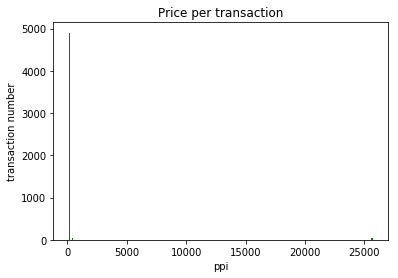

In [28]:
# create a price-per-item column
dF['ppi'] = dF['order_amount']/dF['total_items']


plt.hist(dF['ppi'], 200, facecolor='green')
plt.ylabel('transaction number')
plt.xlabel('ppi')
plt.title('Price per transaction')
plt.show()

Yet again we see some wierd behavior - stores seem to be selling shoes that cost more than \$25000, and there seems to
a divide in stores again - the two bars on the left indicate that there are also stores selling at a higher price than the others, albeit at a more reasonable price than >\$25000

In [10]:
dF.nlargest(100, 'ppi')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ppi
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


As we can see from the output of the 50 stores that have the most expensive items, surprisingly store 42 isn't there, but rather store 78 is, and is selling shoes for apparently \$25725.0 each. Interesting. Lets also check the bottom of the costs:

In [11]:
dF.nsmallest(50, 'ppi')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ppi
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
97,98,92,850,180,2,cash,2017-03-22 19:21:26,90.0
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12,90.0
228,229,92,757,90,1,debit,2017-03-13 23:57:51,90.0
236,237,92,837,180,2,credit_card,2017-03-18 20:51:12,90.0
245,246,92,890,360,4,cash,2017-03-18 17:42:29,90.0
322,323,92,783,90,1,debit,2017-03-08 3:49:15,90.0
335,336,92,853,180,2,cash,2017-03-27 12:53:28,90.0
368,369,92,906,180,2,cash,2017-03-05 0:22:59,90.0
579,580,92,932,180,2,debit,2017-03-10 16:21:43,90.0


We definitely want to check store 78 out, because the rest of the shoes seem to be selling at a much different price. We have already concluded that store 42 suffers from weird behavior because of customer 607, although it still is the second highest charging store in terms of price per unit.

Just to check, let's see if these stores experience different payment methods compositions (i.e. what fraction of purchases at these stores are made with what method, compared to all other stores)

In [12]:
dF.loc[dF['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ppi
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


Store 78 seems to be selling very small quantities of very expensive shoes. Because store 78 didn't show up as a concerning result in our earlier analysis of buyer diversification, it seems like these customers are all different. Perhaps there is some trend among payment methods in this store that other stores aren't taking advantage of. Lets compare the composition of purchases in store 78 (% earned from credit vs. debit vs. cash) to other stores. 

        cash    credit     debit  total
78  0.391304  0.391304  0.217391   46.0


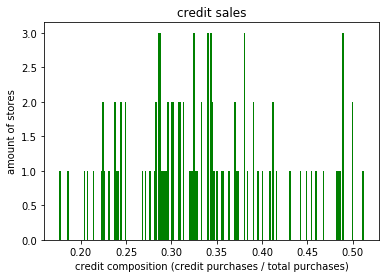

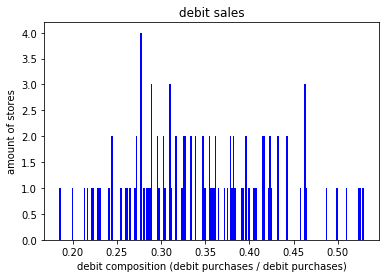

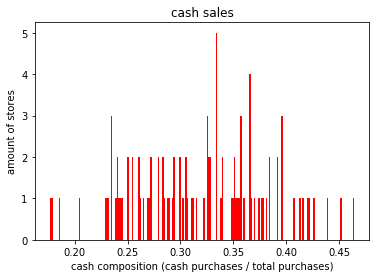

In [30]:
payComp = {}

# map a number to a tuple as follows: {store: (# transactions cash, debit, credit, total transactions)}
for row in dF.iterrows():
    
    pay = row[1]['payment_method']
    store = row[1]['shop_id']
    
    if store in payComp:
        cash, debit, credit, total = payComp[store]
        
        if  pay == 'cash':
            payComp[store] = (cash + 1, debit, credit, total + 1)
        elif pay=='credit_card':
            payComp[store] = (cash , debit, credit + 1, total + 1)
        else:
            payComp[store] = (cash , debit + 1, credit, total + 1)
            
    else:
        if pay == 'cash':
            payComp[store] = (1, 0, 0, 1)
        elif pay == 'credit_card':
            payComp[store] = (0, 0, 1, 1)
        else:
            payComp[store] = (0, 1, 0, 1)

# modify tuples in place to get a percent purchase for each type of payment
for key, value in payComp.iteritems():
    cash, debit, credit, total = payComp[key]
    divisor = float(total)
    
    payComp[key] = (cash/divisor, debit/divisor, credit/divisor, total)
    
# convert to a dataframe
purchasePercent = pd.DataFrame(payComp).transpose()
purchasePercent.columns = ["cash","credit","debit","total"]

# print out our calculated statistics for store 78
print purchasePercent.loc[[78]]

# plot out 3 graphs of different payment types
plt.hist(purchasePercent['credit'], 200, facecolor='green')
plt.ylabel('amount of stores')
plt.xlabel('credit composition (credit purchases / total purchases)')
plt.title('credit sales')
plt.show()

plt.hist(purchasePercent['debit'], 200, facecolor='blue')
plt.ylabel('amount of stores')
plt.xlabel('debit composition (debit purchases / debit purchases)')
plt.title('debit sales')
plt.show()

plt.hist(purchasePercent['cash'], 200, facecolor='red')
plt.ylabel('amount of stores')
plt.xlabel('cash composition (cash purchases / total purchases)')
plt.title('cash sales')
plt.show()



Looking at the distributions of the distribution of the type of transactions that each store sells its shoes through, there are not clear outliers, as we were able to find before with transactions amounts and buyer diversification. Additionally, from the printed statistics for store 78 and the graphs, the distribution of purchases is located pretty close to the median for each graph - certainly not far enough to be suspicious.

In this case, we can attribute what is happening to store 78 as then random luck. Perhaps store 78 is great at marketing. However, the question then moves to if we should include store 78 in an AOV calculation. 